# Project : Census Income


In this project, initially you need to preprocess the data and then develop an understanding of the different features of the data by performing exploratory analysis and creating visualizations. Further, after having sufficient knowledge about the attributes, you will perform a predictive task of classification to predict whether an individual makes over 50,000 a year or less by using different machine learning algorithms.

In [1]:
#import the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\census-income_final (3).csv",skipinitialspace = True)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.rename(columns = {"Unnamed: 14":"income"},inplace = True)

In [6]:
df["income"].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [7]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [8]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [9]:
df = df.replace("?",np.nan)

In [10]:
df['occupation'].nunique()

14

In [11]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [12]:
df.isnull().sum().sum()

4262

In [13]:
df.dropna(inplace = True)

In [14]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [15]:
df.duplicated().sum()

23

In [16]:
df.drop_duplicates(inplace = True)

In [17]:
df.duplicated().sum()

0

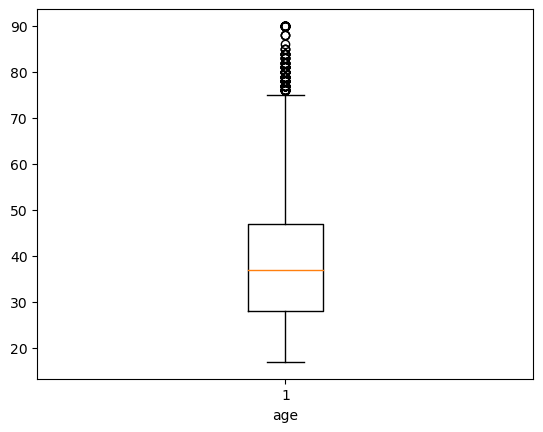

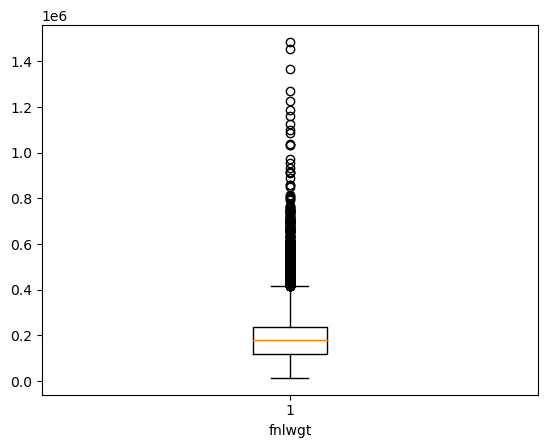

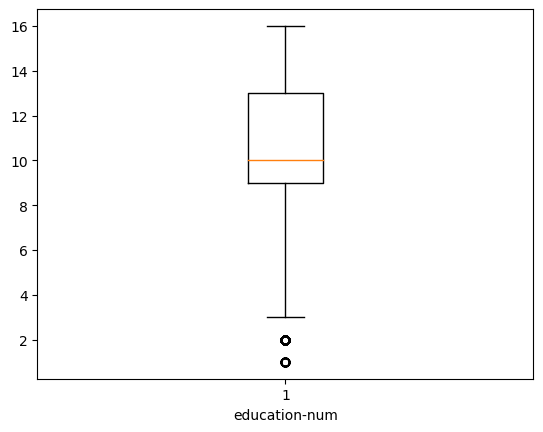

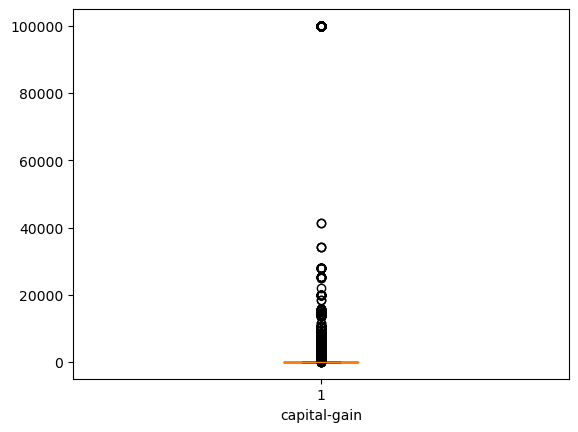

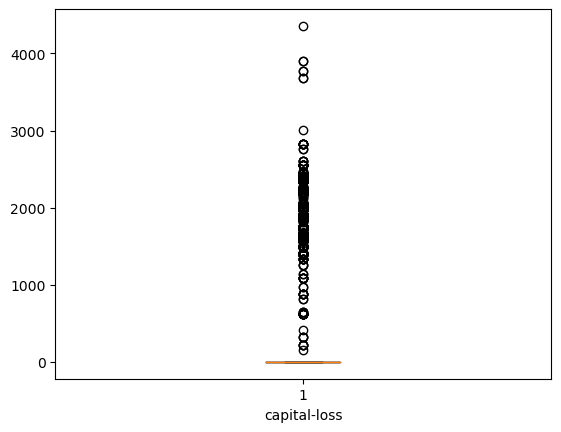

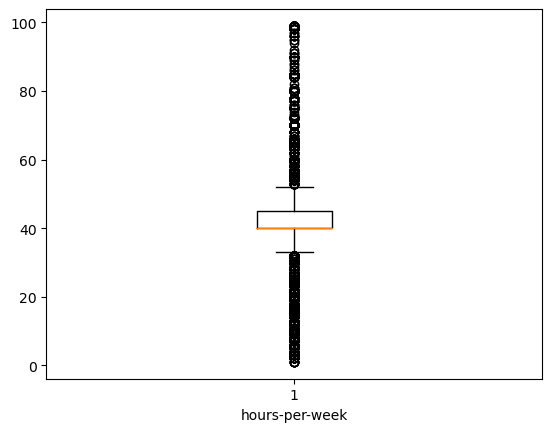

In [18]:
for col in df.columns:
    if df[col].dtype!="object":
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

In [19]:
out_col = ["age","fnlwgt","education-num","hours-per-week"]

In [20]:
for col in out_col:
    Q1 =df[col].quantile(0.25)
    Q3 =df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 *IQR #lower whisker
    UW = Q3 + 1.5 *IQR
    df = df[(df[col]>=LW) & (df[col]<=UW)]

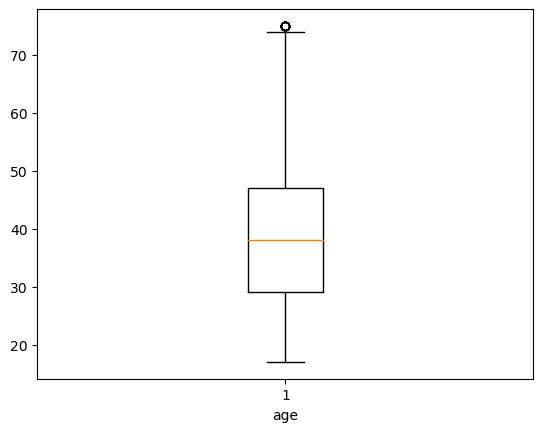

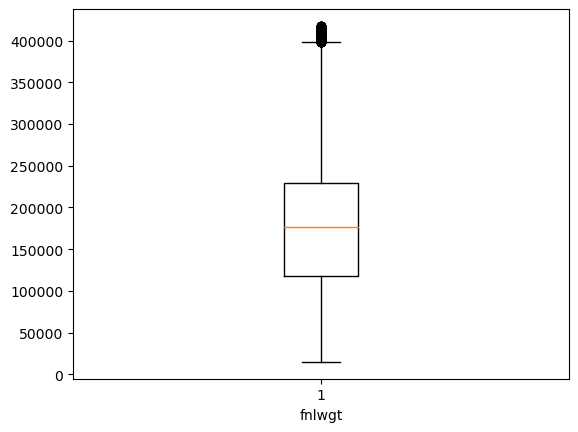

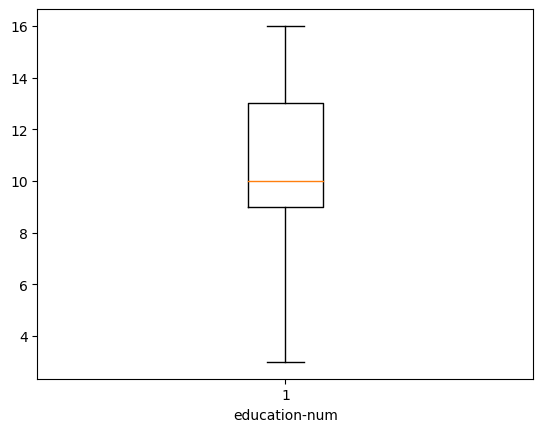

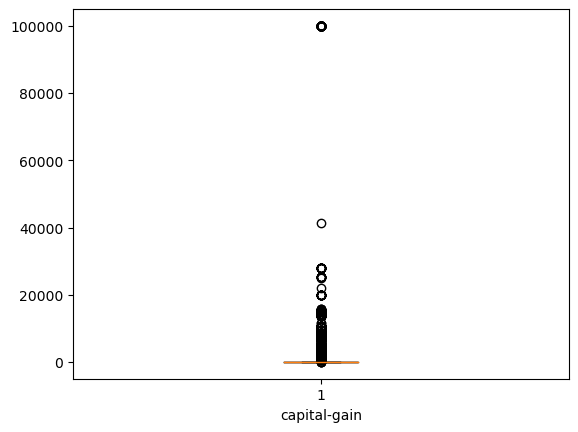

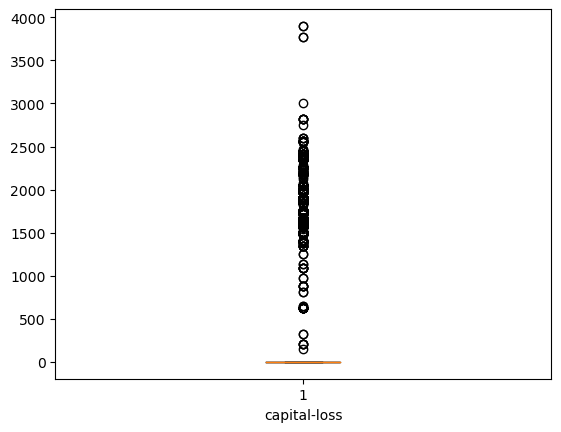

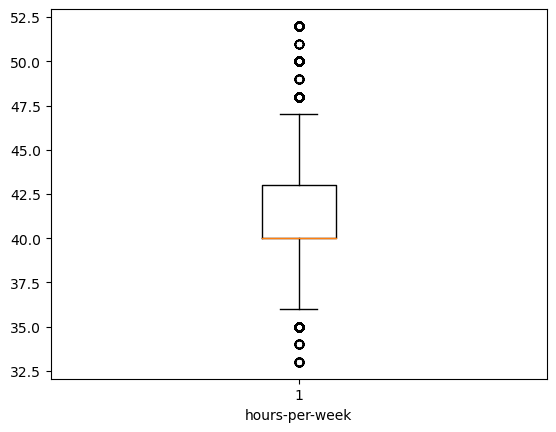

In [21]:
for col in df.columns:
    if df[col].dtype!="object":
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

In [25]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,8,13,4,0,1,4,1,2174,0,40,38,0
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,8,13,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,11,14,2,3,5,4,0,0,0,40,38,0


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [27]:
x = df.iloc[:,:-1]

In [28]:
y = df["income"]

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 1)

In [30]:
rf_model = RandomForestClassifier()

Define Hyperparameter Grid:

Specify a range of hyperparameters to search over using a grid search. Define a parameter grid with a list of hyperparameters and their possible values.

In [36]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


Hyperparameter Tuning with GridSearchCV:
    
Use GridSearchCV from scikit-learn to perform a grid search with cross-validation. This will evaluate different combinations of hyperparameters to find the best set of hyperparameters.

In [37]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [39]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)


In [40]:
accuracy

0.8574108818011257